# Predict students' dropout and academic success

The dataset was created in a project that aims to contribute to the reduction of academic dropout and failure in higher education, by using machine learning techniques to identify students at risk at an early stage of their academic path, so that strategies to support them can be put into place.

The dataset includes information known at the time of student enrollment – academic path, demographics, and social-economic factors.

The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course.

This dataset contains data from a higher education institution on various variables related to undergraduate students, including demographics, social-economic factors, and academic performance, to investigate the impact of these factors on student dropout and academic success

Marital status: The marital status of the student. (Categorical)

Application mode: The method of application used by the student. (Categorical)

Application order: The order in which the student applied. (Numerical)

Course: The course taken by the student. (Categorical)

Daytime/evening attendance: Whether the student attends classes during the day or in the evening. (Categorical)

Previous qualification: The qualification obtained by the student before enrolling in higher education. (Categorical)

Nacionality: The nationality of the student. (Categorical)

Mother's qualification: The qualification of the student's mother. (Categorical)

Father's qualification: The qualification of the student's father. (Categorical)

Mother's occupation: The occupation of the student's mother. (Categorical)

Father's occupation: The occupation of the student's father. (Categorical)

Displaced: Whether the student is a displaced person. (Categorical)

Educational special needs: Whether the student has any special educational needs. (Categorical)

Debtor: Whether the student is a debtor. (Categorical)

Tuition fees up to date: Whether the student's tuition fees are up to date. (Categorical)

Gender: The gender of the student. (Categorical)

Scholarship holder: Whether the student is a scholarship holder. (Categorical)

Age at enrollment: The age of the student at the time of enrollment. (Numerical)

International: Whether the student is an international student. (Categorical)

Curricular units 1st sem (credited): The number of curricular units credited by the student in the first semester. (Numerical)

Curricular units 1st sem (enrolled): The number of curricular units enrolled by the student in the first semester. (Numerical)

Curricular units 1st sem (evaluations): The number of curricular units evaluated by the student in the first semester. (Numerical)

Curricular units 1st sem (approved): The number of curricular units approved by the student in the first semester. (Numerical)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('/content/drive/MyDrive/data folder/data.csv')
df.head()

,"Marital status;Application mode;Application order;Course;""Daytime/evening attendance\t"";Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target"
0,1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...
1,1;15;1;9254;1;1;160.0;1;1;3;3;3;142.5;1;0;0;0;...
2,1;1;5;9070;1;1;122.0;1;37;37;9;9;124.8;1;0;0;0...
3,1;17;2;9773;1;1;122.0;1;38;37;5;3;119.6;1;0;0;...
4,2;39;1;8014;0;1;100.0;1;37;38;9;9;141.5;0;0;0;...


In [3]:
df = pd.read_csv('/content/drive/MyDrive/data folder/data.csv',sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

**Data Preprocessing**

In [6]:
df.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [8]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [9]:
df.size

163688

In [10]:
df.shape

(4424, 37)

In [11]:
dpl_rows=df.duplicated().sum()
print(dpl_rows)

0


In [12]:
for i in df.columns:
  print(df[i].unique(),i)
  print('\n')

[1 2 4 3 5 6] Marital status


[17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27] Application mode


[5 1 2 4 3 6 9 0] Application order


[ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119] Course


[1 0] Daytime/evening attendance	


[ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14] Previous qualification


[122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170.  155.  145.  152.  112.  107.  156.  188.   96.  161.  166.
 147.  144.  102.  101.  180.  172.  105.  108.  165.  190.  162.  164.
 163.  159.  117.4 175.  133.8 176.  168.  139.3  97.  157.  140.8 184.4
 148.9 109.  174.  182.  138.6  95.  154.4 163.3 145.7 123.9 124.4 169.
 177.  138.7 119.1 118.9 126.6] Previous qualification (grade)


[  

In [13]:
for i in df.columns:
  print(df[i].value_counts(),i)
  print('\n')

Marital status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64 Marital status


Application mode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64 Application mode


Application order
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64 Application order


Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64 Course


Daytime/evening attendance\t
1    3941
0     483
Name: count, dtype: int64 Daytime/evening attendance	


Previous qualification
1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9    

In [14]:
df.isnull().sum()/len(df)*100

,0
Marital status,0.0
Application mode,0.0
Application order,0.0
Course,0.0
Daytime/evening attendance\t,0.0
Previous qualification,0.0
Previous qualification (grade),0.0
Nationality,0.0
Mother's qualification,0.0
Father's qualification,0.0


Hereby we can say that there is no null values in the dataset, we need to do two other steps before moving into the EDA part. ie,

Encoding the target column(Since it is the only non-numeric field in the dataset)

In [15]:
df["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

So there are 3 unique values in target column which we can replace by

 *  Dropout - 0

 *  Enrolled - 1

 *  Graduate - 2

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
df['Target'] = le.fit_transform(df.iloc[:,36])
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [19]:
df.corr()['Target']

,Target
Marital status,-0.089804
Application mode,-0.221747
Application order,0.089791
Course,0.034219
Daytime/evening attendance\t,0.075107
Previous qualification,-0.056039
Previous qualification (grade),0.103764
Nationality,-0.014801
Mother's qualification,-0.043178
Father's qualification,-0.001393


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


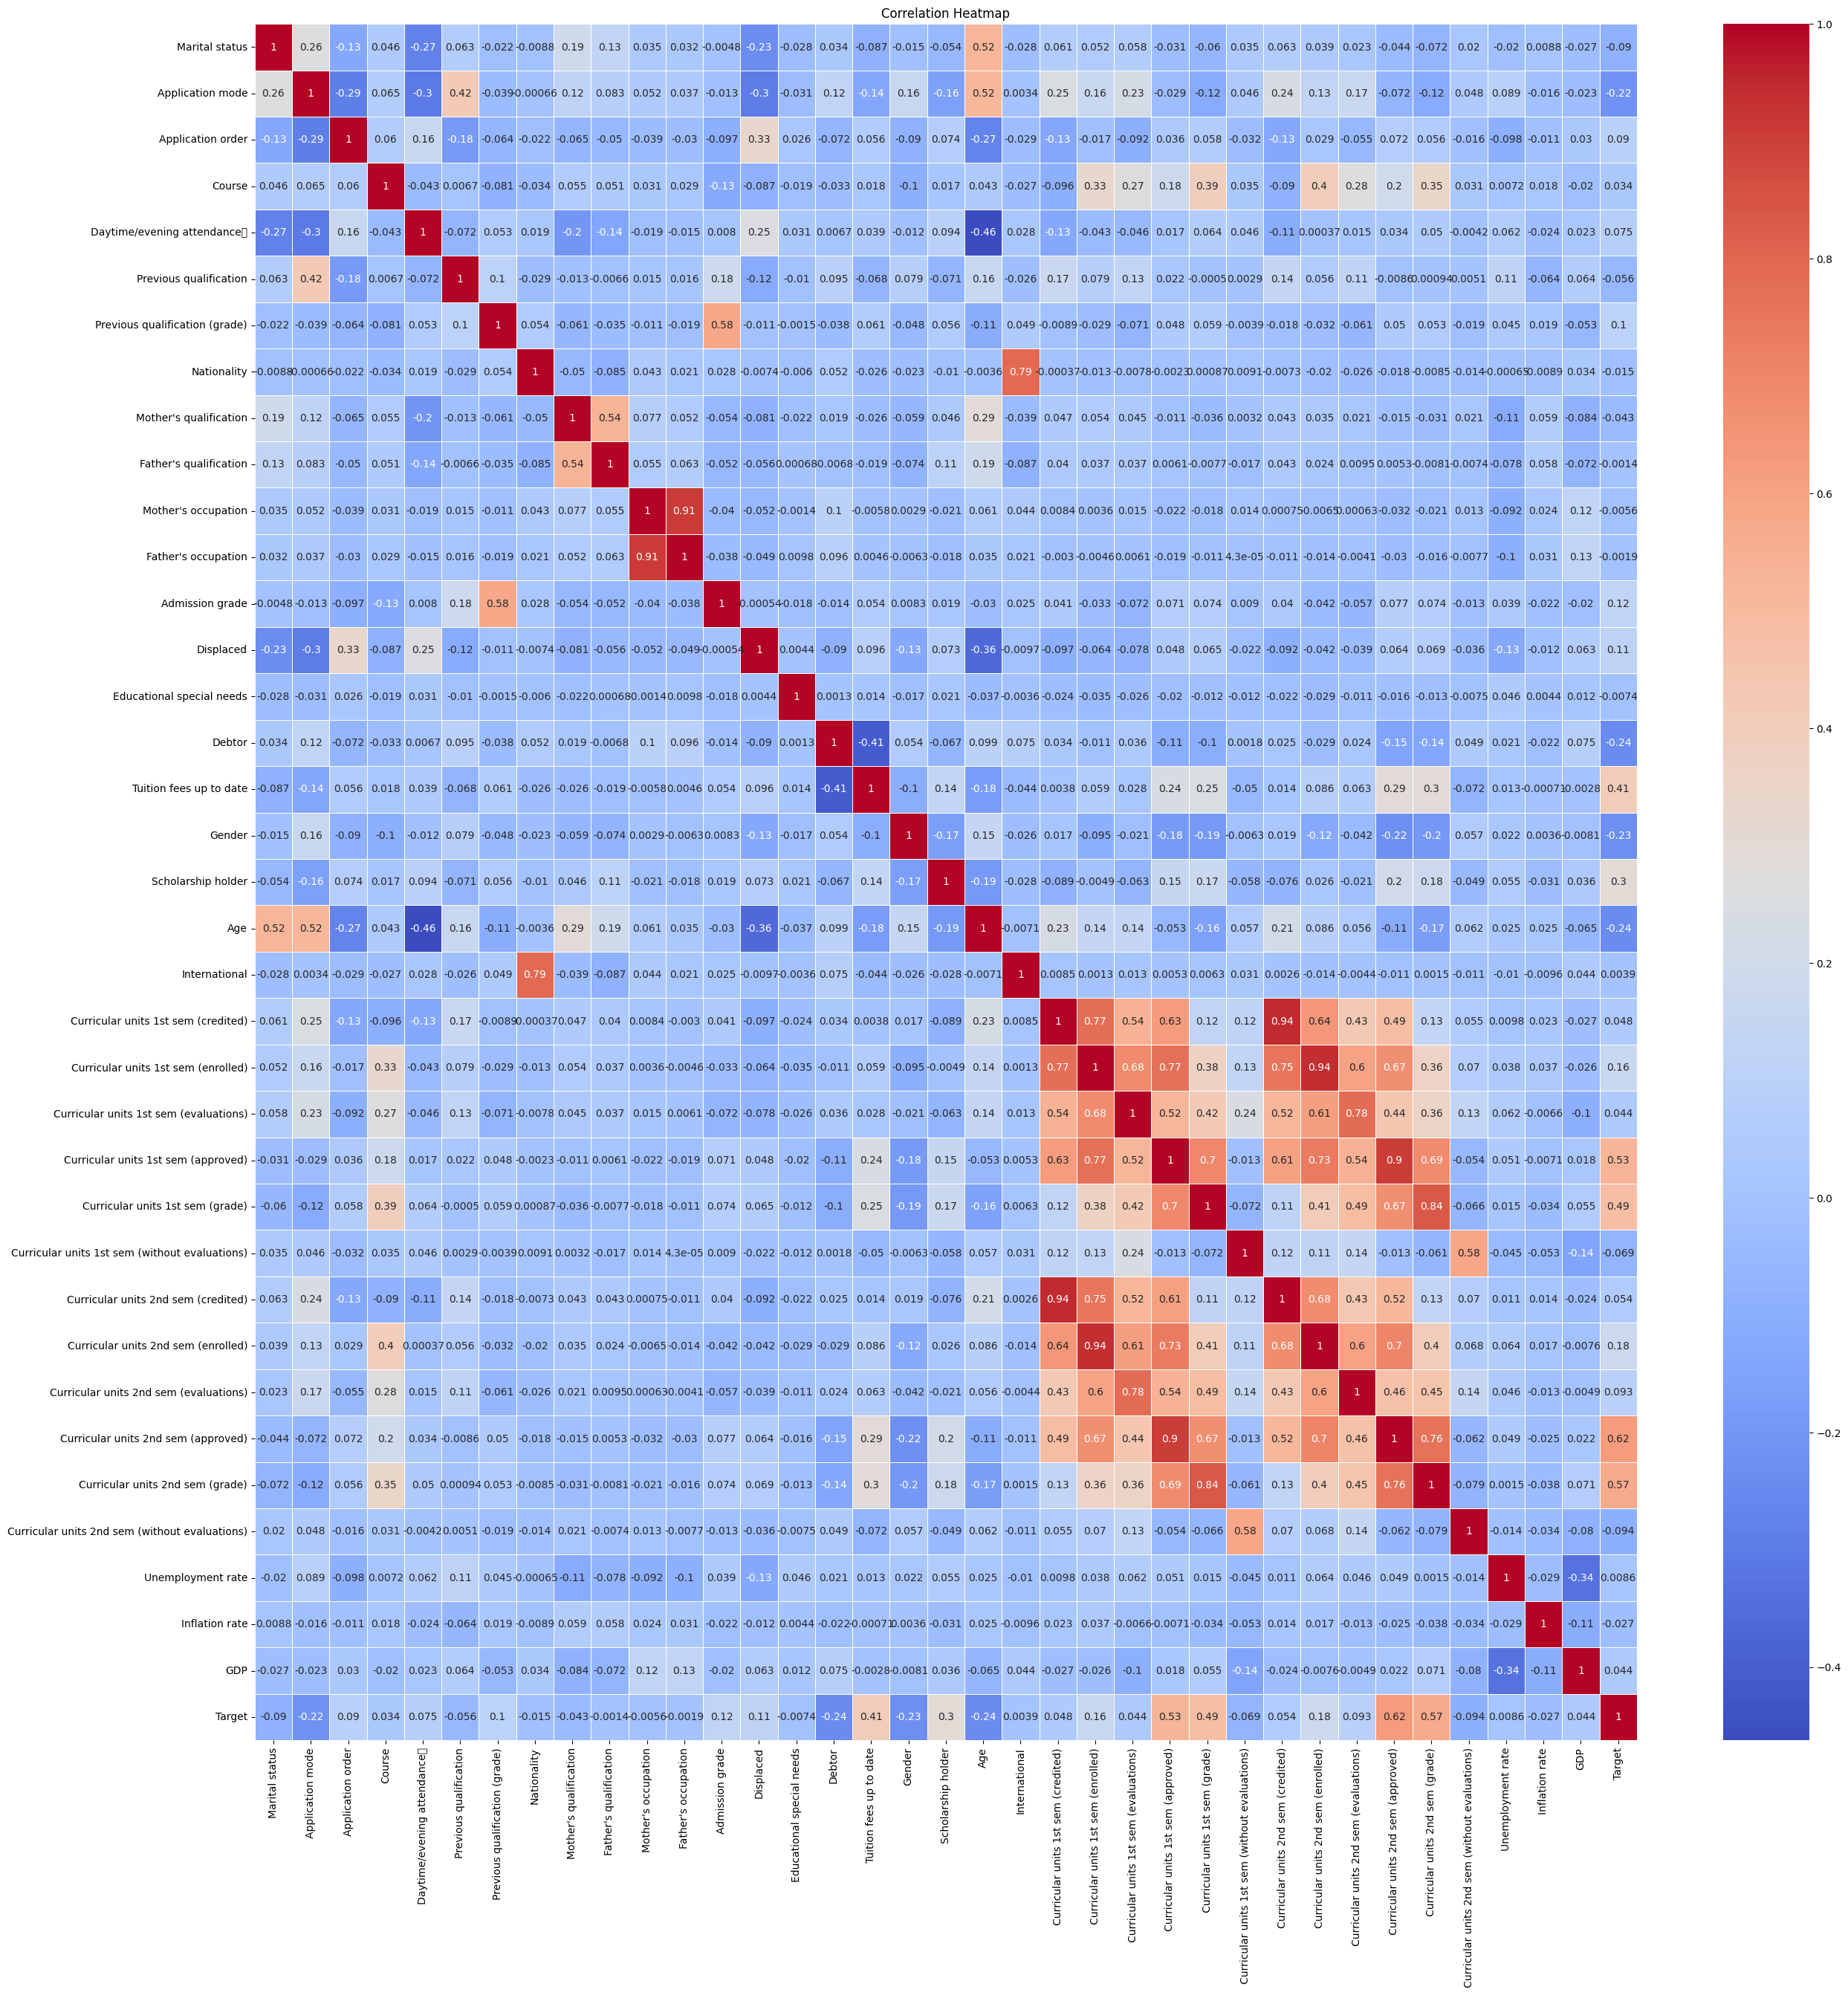

In [20]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
df1 = df.copy()
df1 = df1.drop(columns=['Nationality',
                                  'Mother\'s qualification',
                                  'Father\'s qualification',
                                  'Educational special needs',
                                  'International',
                                  'Curricular units 1st sem (without evaluations)',
                                  'Unemployment rate',
                                  'Inflation rate'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Mother's occupation                             4424 non-null   int64  
 8   Father's occupation                             4424 non-null   int64  
 9   Admission grade                          

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Mother's occupation                             4424 non-null   int64  
 8   Father's occupation                             4424 non-null   int64  
 9   Admission grade                          

**Outliers**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


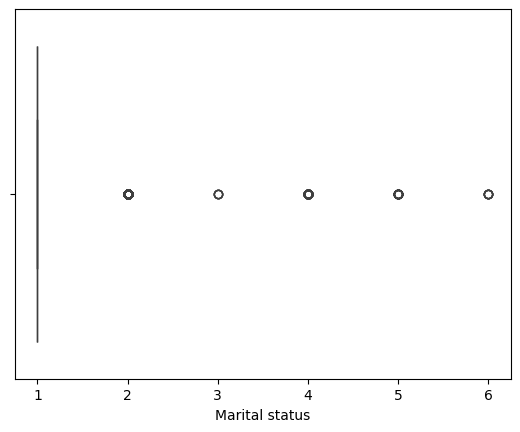

Marital status ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


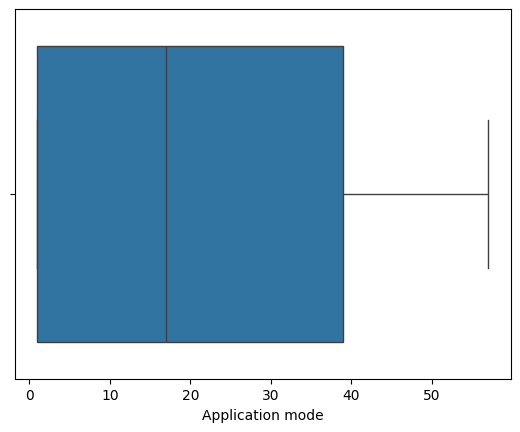

Application mode ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


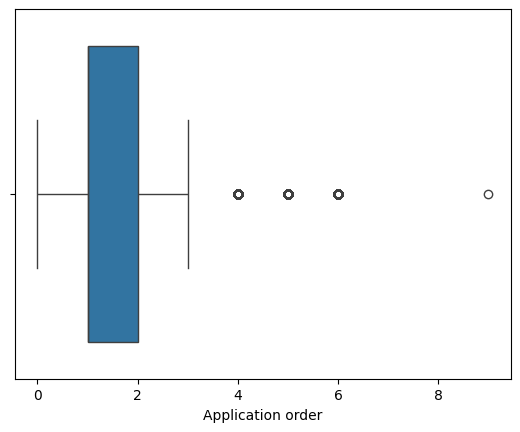

Application order ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


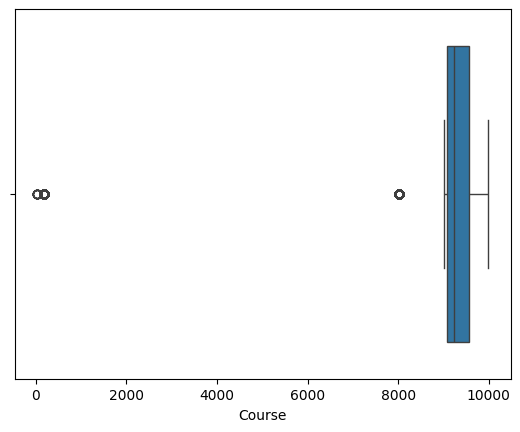

Course ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


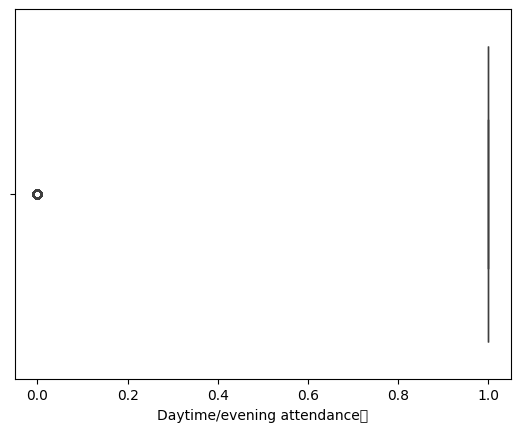

Daytime/evening attendance	 ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


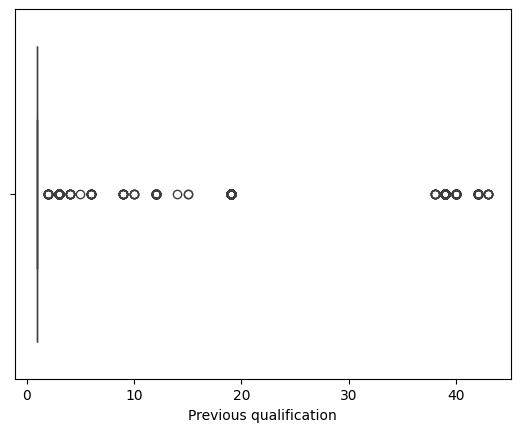

Previous qualification ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


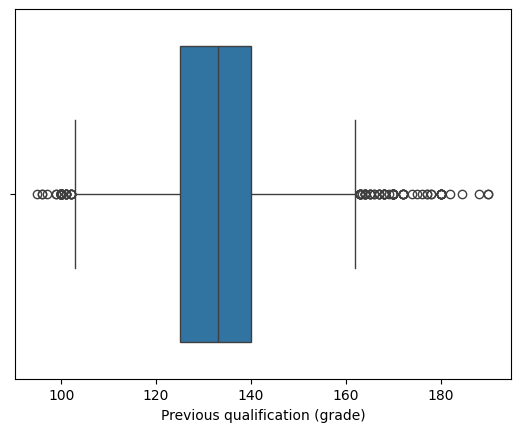

Previous qualification (grade) ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


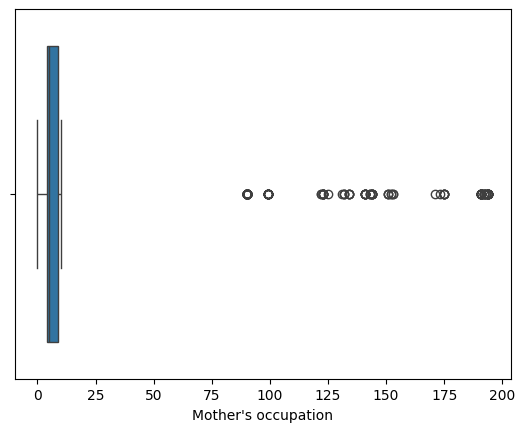

Mother's occupation ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


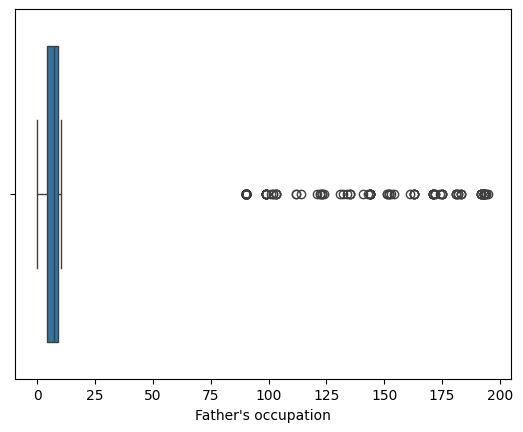

Father's occupation ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


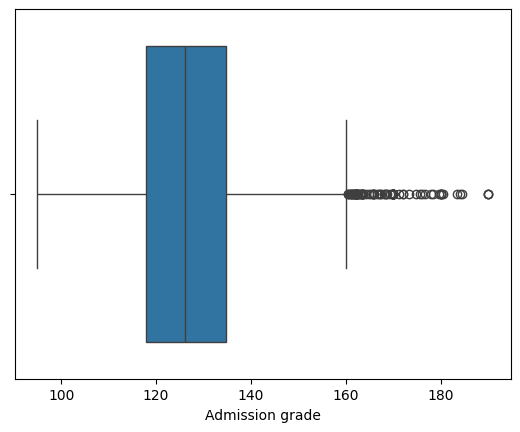

Admission grade ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


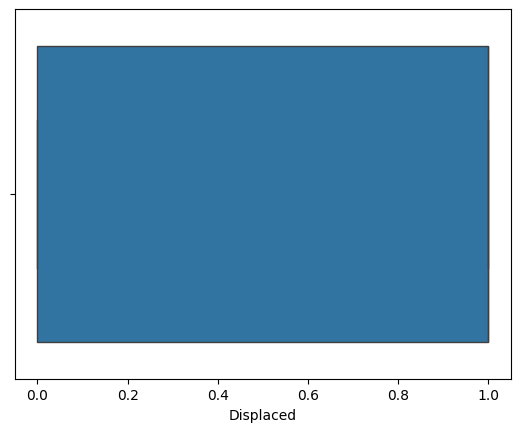

Displaced ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


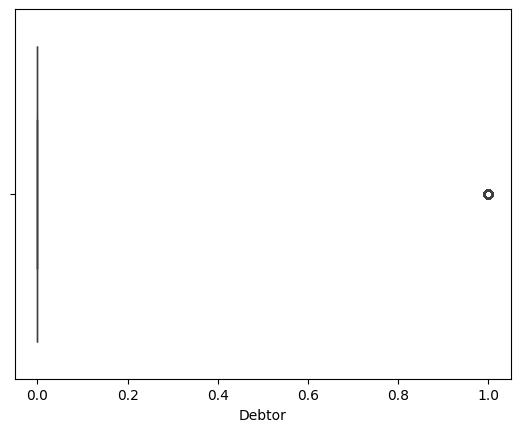

Debtor ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


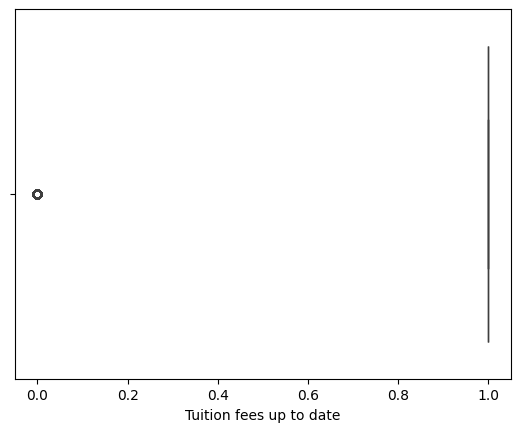

Tuition fees up to date ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


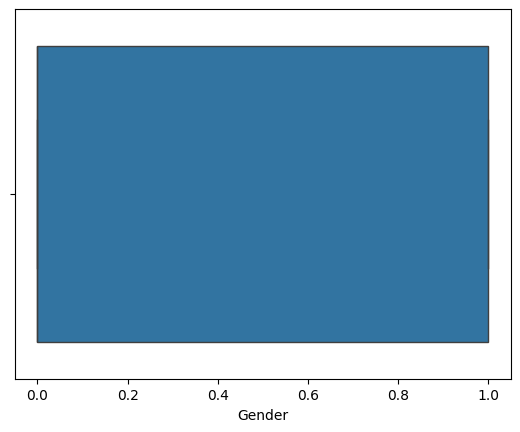

Gender ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


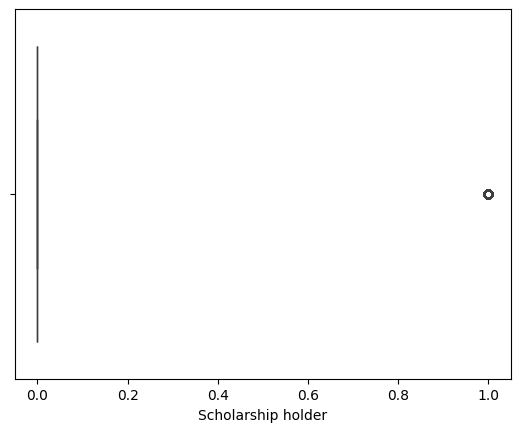

Scholarship holder ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


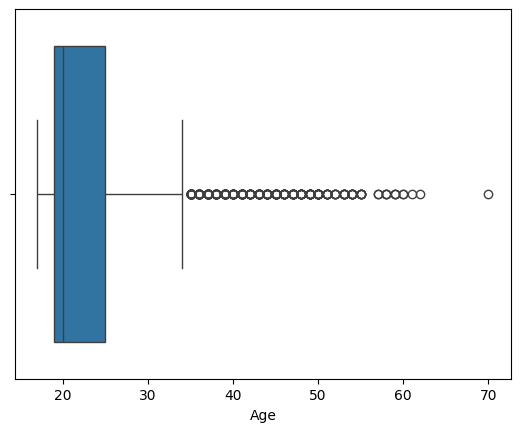

Age ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


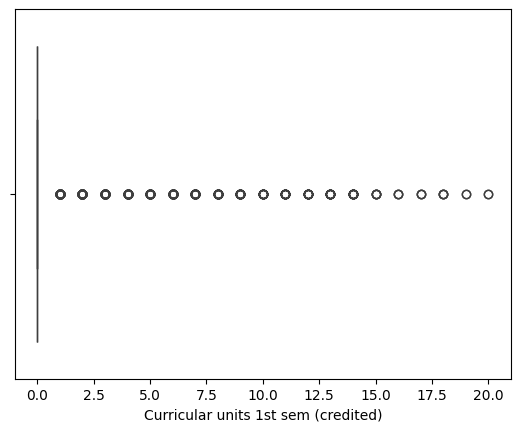

Curricular units 1st sem (credited) ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


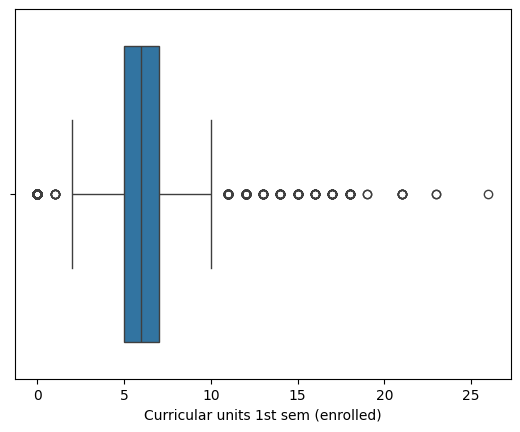

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Curricular units 1st sem (enrolled) ****************************************************************************************************


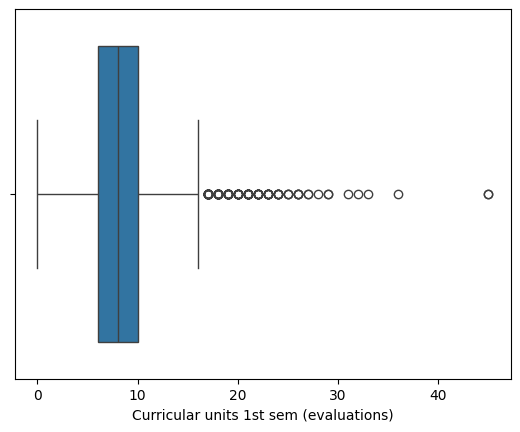

Curricular units 1st sem (evaluations) ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


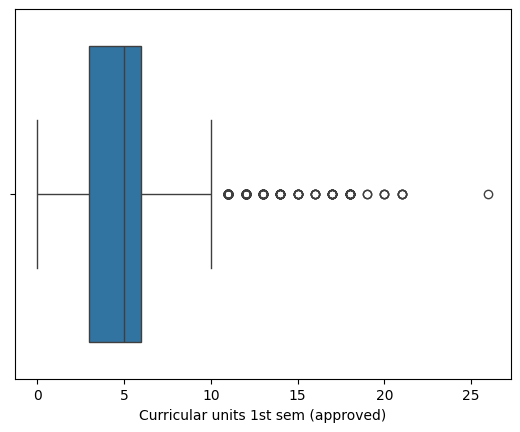

Curricular units 1st sem (approved) ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


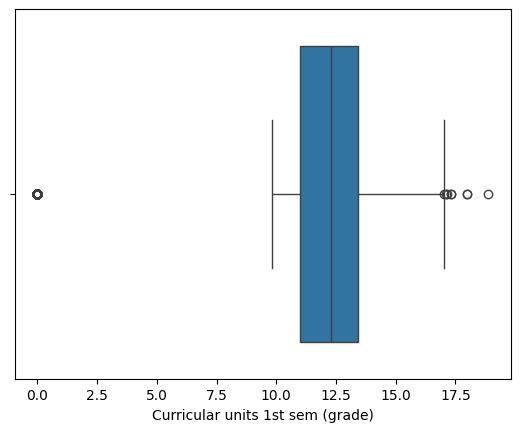

Curricular units 1st sem (grade) ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


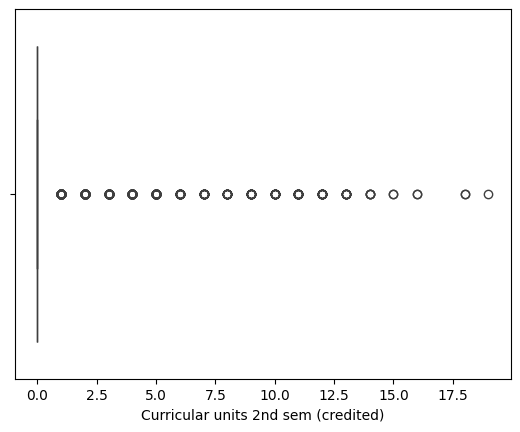

Curricular units 2nd sem (credited) ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


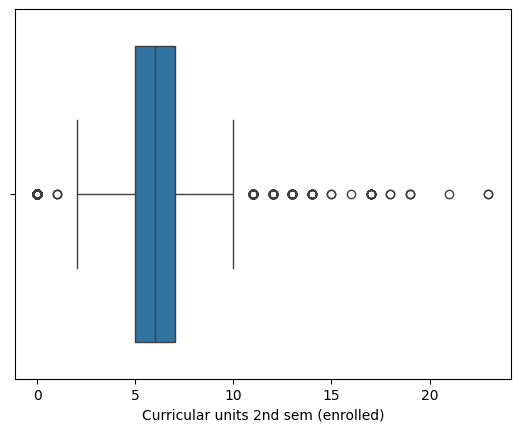

Curricular units 2nd sem (enrolled) ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


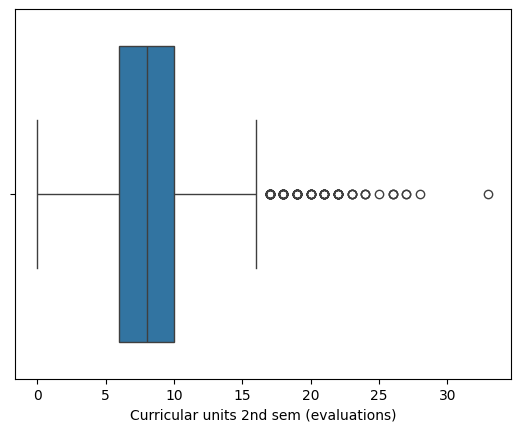

Curricular units 2nd sem (evaluations) ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


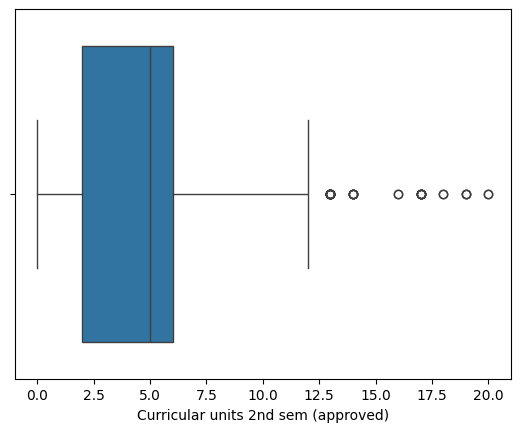

Curricular units 2nd sem (approved) ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


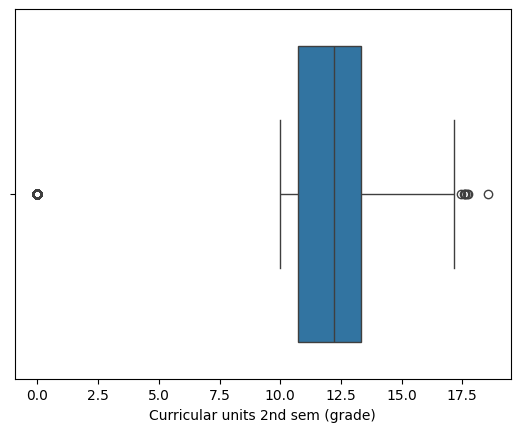

Curricular units 2nd sem (grade) ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


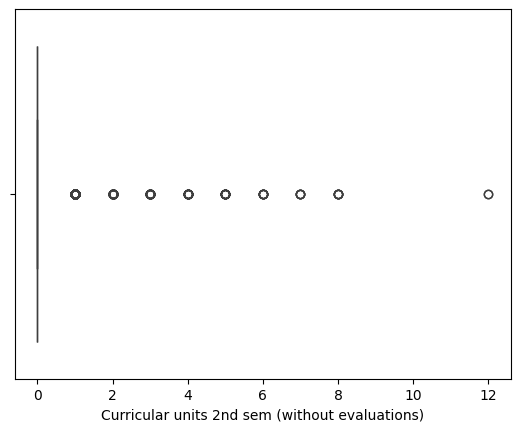

Curricular units 2nd sem (without evaluations) ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


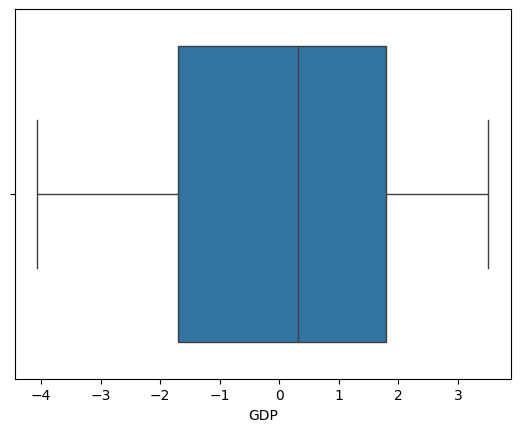

GDP ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


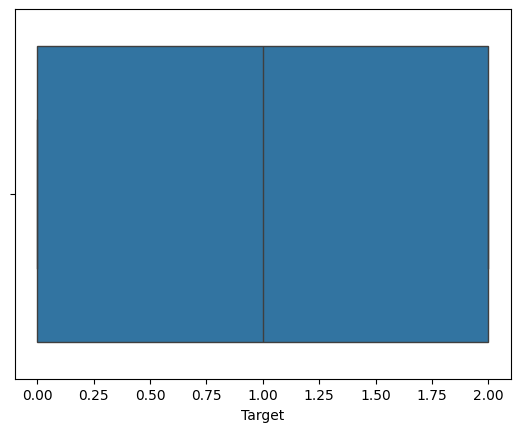

Target ****************************************************************************************************


In [23]:
for i in df1.columns:
  sns.boxplot(x = df1[i])
  plt.show()
  print(i,'*'*100)

In [24]:
Q1 = df1['Course'].quantile(0.25)
Q3 = df1['Course'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
outliers = df[(df1['Course']<lower_bound) | (df1['Course']>upper_bound)]

In [25]:
lower_bound

8378.5

In [26]:
upper_bound

10262.5

In [27]:
outliers

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
20,1,1,3,171,1,1,122.0,1,1,1,...,0,0,0,0,0.000000,0,11.1,0.6,2.02,2
33,1,18,1,8014,0,1,138.0,1,19,1,...,0,6,8,6,14.375000,0,12.4,0.5,1.79,2
35,1,39,1,33,1,1,130.0,1,38,37,...,0,7,7,1,10.000000,0,8.9,1.4,3.51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,1,39,1,8014,0,1,133.1,1,19,37,...,0,6,6,3,12.333333,0,11.1,0.6,2.02,0
4365,1,1,2,171,1,1,117.0,1,38,38,...,0,0,0,0,0.000000,0,7.6,2.6,0.32,2
4370,1,1,3,171,1,1,137.0,1,1,3,...,0,0,0,0,0.000000,0,12.7,3.7,-1.70,2
4383,1,39,2,8014,0,1,141.0,1,37,37,...,0,6,8,6,15.625000,0,12.4,0.5,1.79,2


In [28]:
df2 = df1[(df1['Course'] >= lower_bound) & (df1['Course'] <= upper_bound)]
df2

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's occupation,Father's occupation,Admission grade,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP,Target
1,1,15,1,9254,1,1,160.0,3,3,142.5,...,6,14.000000,0,6,6,6,13.666667,0,0.79,2
2,1,1,5,9070,1,1,122.0,9,9,124.8,...,0,0.000000,0,6,0,0,0.000000,0,1.74,0
3,1,17,2,9773,1,1,122.0,5,3,119.6,...,6,13.428571,0,6,10,5,12.400000,0,-3.12,2
5,2,39,1,9991,0,19,133.1,9,7,114.8,...,5,11.857143,0,5,17,5,11.500000,5,-0.92,2
6,1,1,1,9500,1,1,142.0,7,10,128.4,...,7,13.300000,0,8,8,8,14.345000,0,-4.06,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,5,4,122.2,...,5,13.600000,0,6,8,5,12.666667,0,-4.06,2
4420,1,1,2,9773,1,1,120.0,9,9,119.0,...,6,12.000000,0,6,6,2,11.000000,0,2.02,0
4421,1,1,1,9500,1,1,154.0,9,9,149.5,...,7,14.912500,0,8,9,1,13.500000,0,0.79,0
4422,1,1,1,9147,1,1,180.0,7,4,153.8,...,5,13.800000,0,5,6,5,12.000000,0,-3.12,2


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


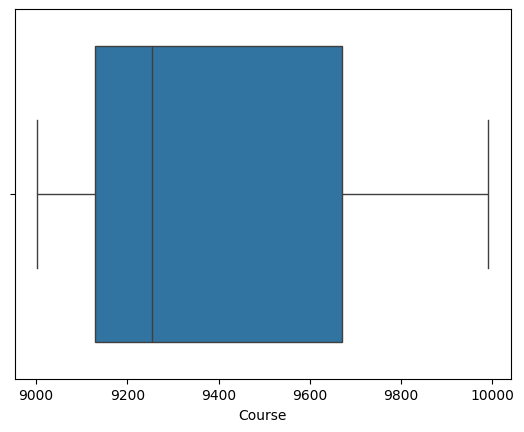

In [29]:
sns.boxplot(x=df2['Course'])
plt.show()

**Exploratory Data Analysis**

lets see how many dropouts, enrolled & graduates are there in Target column

In [30]:
df1['Target'].value_counts()

,count
Target,
2,2209
0,1421
1,794


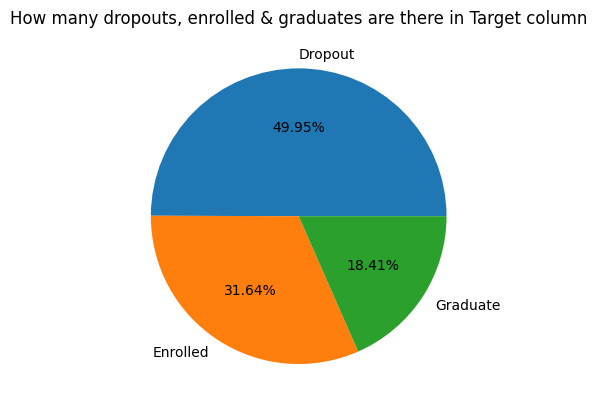

In [31]:
target_counts = df2['Target'].value_counts()
labels = ['Dropout', 'Enrolled', 'Graduate']

plt.pie(target_counts, labels=labels, autopct='%1.2f%%', radius=1)
plt.title('How many dropouts, enrolled & graduates are there in Target column')

plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [33]:
x = df.drop('Target',axis=1)
y = df['Target']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [35]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()

x_train = sd.fit_transform(x_train)
x_test = sd.fit_transform(x_test)

**Building Models**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [37]:
dt = DecisionTreeClassifier(random_state=0,max_depth=4,criterion='entropy')
rfc = RandomForestClassifier(random_state=2)
knn = KNeighborsClassifier(n_neighbors=3)
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=0)
svm = SVC(kernel='linear')
nb=GaussianNB()

Decision Tree

In [38]:
dt.fit(x_train,y_train)
y_pred1=dt.predict(x_test)
y_pred1

array([1, 0, 2, ..., 1, 2, 2])

In [39]:
confusion_matrix(y_test,y_pred1)

array([[217,  57,  79],
       [ 28,  53, 112],
       [  2,   7, 551]])

In [51]:
dt_accuracy = accuracy_score(y_test,y_pred1)
dt_accuracy

0.7423146473779385

In [41]:
#testing score

testing_score = dt.score(x_test,y_test)
testing_score

0.7423146473779385

In [42]:
#training score

training_score = dt.score(x_train,y_train)
training_score

0.7450271247739603

In [43]:
#classification report

print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.61      0.72       353
           1       0.45      0.27      0.34       193
           2       0.74      0.98      0.85       560

    accuracy                           0.74      1106
   macro avg       0.69      0.62      0.64      1106
weighted avg       0.74      0.74      0.72      1106



Decision Tree has accuracy score of 74.23%

These scores are relatively close to each other, indicating that the model is not overfitting.

KNN

In [44]:
knn.fit(x_train,y_train)

y_pred2 = knn.predict(x_test)
y_pred2

array([2, 0, 2, ..., 1, 2, 2])

In [45]:
#testing score

testing_score = knn.score(x_test,y_test)
testing_score

0.6934900542495479

In [46]:
#training score

training_score = knn.score(x_train,y_train)
training_score

0.8191681735985533

In [47]:
#confusion metrix

confusion_matrix(y_test,y_pred2)

array([[246,  42,  65],
       [ 62,  46,  85],
       [ 43,  42, 475]])

In [52]:
#accuracy score

knn_accuracy = accuracy_score(y_test,y_pred2)
knn_accuracy

0.6934900542495479

In [53]:
#classification report

print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       353
           1       0.35      0.24      0.28       193
           2       0.76      0.85      0.80       560

    accuracy                           0.69      1106
   macro avg       0.60      0.59      0.60      1106
weighted avg       0.67      0.69      0.68      1106



SVM

In [54]:
svm.fit(x_train,y_train)

y_pred3 = svm.predict(x_test)
y_pred3

array([2, 0, 2, ..., 0, 2, 2])

In [55]:
#testing score

testing_score = svm.score(x_test,y_test)
testing_score

0.7730560578661845

In [56]:
#training score

training_score = svm.score(x_train,y_train)
training_score

0.77124773960217

In [57]:
#confusion metrix

confusion_matrix(y_test,y_pred3)

array([[253,  50,  50],
       [ 37,  71,  85],
       [ 13,  16, 531]])

In [58]:
 #accuracy score

svm_accuracy = accuracy_score(y_test,y_pred3)
svm_accuracy

0.7730560578661845

In [59]:
#classification report

print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       353
           1       0.52      0.37      0.43       193
           2       0.80      0.95      0.87       560

    accuracy                           0.77      1106
   macro avg       0.72      0.68      0.69      1106
weighted avg       0.76      0.77      0.76      1106



NavieBias

In [60]:
nb.fit(x_train,y_train)

y_pred4 = nb.predict(x_test)
y_pred4

array([2, 0, 2, ..., 0, 2, 2])

In [61]:
#testing score

testing_score = nb.score(x_test,y_test)
testing_score

0.659132007233273

In [62]:
#training score

training_score = nb.score(x_train,y_train)
training_score

0.6729957805907173

In [63]:
#confusion metrix

confusion_matrix(y_test,y_pred4)

array([[235,  36,  82],
       [ 39,  25, 129],
       [ 42,  49, 469]])

In [64]:
#accuracy score

nb_accuracy = accuracy_score(y_test,y_pred4)
nb_accuracy

0.659132007233273

In [65]:
#classification report

print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70       353
           1       0.23      0.13      0.17       193
           2       0.69      0.84      0.76       560

    accuracy                           0.66      1106
   macro avg       0.55      0.54      0.54      1106
weighted avg       0.63      0.66      0.64      1106



Ensemble learning

random forest

In [66]:
rfc.fit(x_train,y_train)

y_pred5 = rfc.predict(x_test)
y_pred5

array([2, 0, 2, ..., 0, 2, 2])

In [67]:
#testing score

testing_score = rfc.score(x_test,y_test)
testing_score

0.8028933092224232

In [68]:
#training score

training_score = rfc.score(x_train,y_train)
training_score

1.0

In [69]:
#confusion metrix

confusion_matrix(y_test,y_pred5)

array([[277,  33,  43],
       [ 43,  77,  73],
       [ 11,  15, 534]])

In [70]:
#accuracy score

rfc_accuracy = accuracy_score(y_test,y_pred5)
rfc_accuracy

0.8028933092224232

In [71]:
#classification report

print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       353
           1       0.62      0.40      0.48       193
           2       0.82      0.95      0.88       560

    accuracy                           0.80      1106
   macro avg       0.76      0.71      0.73      1106
weighted avg       0.79      0.80      0.79      1106



AdaBoost

In [72]:
abc.fit(x_train,y_train)

y_pred6 = abc.predict(x_test)
y_pred6

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


array([2, 0, 2, ..., 0, 2, 2])

In [73]:
#testing score

testing_score = abc.score(x_test,y_test)
testing_score

0.7802893309222423

In [74]:
#training score

training_score = abc.score(x_train,y_train)
training_score

0.7646172393007836

In [75]:
#confusion metrix

confusion_matrix(y_test,y_pred6)

array([[284,  35,  34],
       [ 51,  70,  72],
       [ 22,  29, 509]])

In [76]:
#accuracy score

abc_accuracy = accuracy_score(y_test,y_pred6)
abc_accuracy

0.7802893309222423

In [77]:
#classification report

print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       353
           1       0.52      0.36      0.43       193
           2       0.83      0.91      0.87       560

    accuracy                           0.78      1106
   macro avg       0.72      0.69      0.70      1106
weighted avg       0.76      0.78      0.77      1106



<ipython-input-79-2a8c76376a9c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 

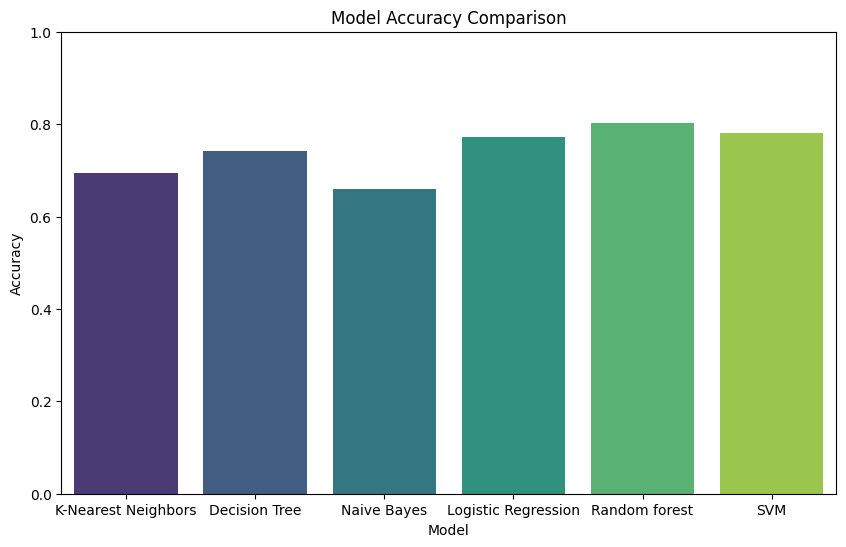

In [79]:
import matplotlib.pyplot as plt



model_names = ['K-Nearest Neighbors', 'Decision Tree', 'Naive Bayes','Logistic Regression','Random forest','SVM']
accuracies = [knn_accuracy, dt_accuracy, nb_accuracy,svm_accuracy,rfc_accuracy,abc_accuracy]

# Plot accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()

From these modeling the best two models are RandomForest and SVM(linear)

So we use these models for Hyperparameter Tuning

HYPER-PARAMETER TUNING

GridSearchCV

In [ ]:
svc = SVC(kernel = 'linear')

params = {'C':[1.0,1,1.5],'gamma':['scale', 'auto'],'coef0':[0.0,1.0,2.0,3.0],'class_weight':['balanced']}

svc1 = GridSearchCV(svc,params,cv=10,scoring='accuracy')
svc1.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid={'C': [1.0, 1, 1.5], 'class_weight': ['balanced'],
                         'coef0': [0.0, 1.0, 2.0, 3.0],
                         'gamma': ['scale', 'auto']},
             scoring='accuracy')

In [ ]:
svc1.best_params_

{'C': 1.5, 'class_weight': 'balanced', 'coef0': 0.0, 'gamma': 'scale'}

In [ ]:
svc2 = SVC(kernel = 'linear',C = 1.5, class_weight = 'balanced', coef0 = 0.0, gamma ='scale')

svc2.fit(x_train,y_train)

y_pred7 = svc2.predict(x_test)
y_pred7

array([1, 0, 2, ..., 1, 2, 2])

In [ ]:
#accuracy score

accuracy_score(y_test,y_pred7)

0.7323688969258589

By doing GridSearchCV on SVC(linear) it seems thar=t the accuracy is reduced to 73.23%

RandomizedSearchCV

In [ ]:
param_dist = {'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'] }

In [ ]:
clf1 = RandomForestClassifier(random_state=2)

In [ ]:
randomCV = RandomizedSearchCV(clf1,param_distributions=param_dist,cv=10)

In [ ]:
randomCV.fit(x_train,y_train)
print(randomCV.best_params_)

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini'}


In [ ]:
print(randomCV.score(x_test,y_test))

0.7956600361663653


In [ ]:
clf2 = RandomForestClassifier(n_estimators= 100, min_samples_split= 2, min_samples_leaf= 1, max_features= 'log2', max_depth = 20, criterion = 'gini')


In [ ]:
clf2.fit(x_train,y_train)

y_pred8 = clf2.predict(x_test)
y_pred8

array([2, 0, 2, ..., 0, 2, 2])

In [ ]:
#accuracy score

accuracy_score(y_test,y_pred8)

0.8019891500904159

From this model evulation RandomForest model is the best model

So we choosing RandomForest model for steamlit Evaluation

**STREAMLIT**

In [ ]:
import pickle

pickle.dump(clf2,open('model.sav','wb'))

In [ ]:
import pickle

pickle.dump(sd,open('scaler.sav','wb'))